In [1]:
#Import Required Library
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import Point
from matplotlib import pyplot as plt
import matplotlib_map_utils as mu

In [2]:
#Change my working directory
os.getcwd()
path =r'C:\Users\Prabin-PC\Downloads\MINIPROJECT\ASSIGNMENTS 2'
os.chdir(path)

In [3]:
# Load the transmissivity values and Jefferson County boundaries
Tvalues = gpd.read_file("TvaluesEPSG6350.gpkg")
Jeff = gpd.read_file("Jeff6350.gpkg")

# Check the columns in Tvalues
print(Tvalues.columns)

Index(['OBJECTID', 'WellID', 'Lon', 'Lat', 'T', 'Source', 'geometry'], dtype='object')


In [4]:
# Load the transmissivity values GeoDataFrame
Tvalues = gpd.read_file("TvaluesEPSG6350.gpkg")  # Adjust the path as needed

# Get the specific column headers
specific_columns = ['WellID', 'Lon', 'Lat', 'T']
column_headers = Tvalues[specific_columns].columns.tolist()

# Print the specific column headers
print("Column Headers:", column_headers)

# Print all column data for the selected columns
print(Tvalues[specific_columns])

Column Headers: ['WellID', 'Lon', 'Lat', 'T']
   WellID        Lon        Lat      T
0       1 -94.071944  30.065000  55200
1       2 -94.035278  30.066667  13100
2       3 -94.046389  30.064167  18000
3       4 -94.073889  30.060556  18300
4       5 -94.073889  30.066389  16300
5       6 -94.044167  30.062222  30800
6       7 -94.349167  29.832778  21000
7       8 -94.249722  29.756667  21300
8       9 -94.249722  29.756667  20800


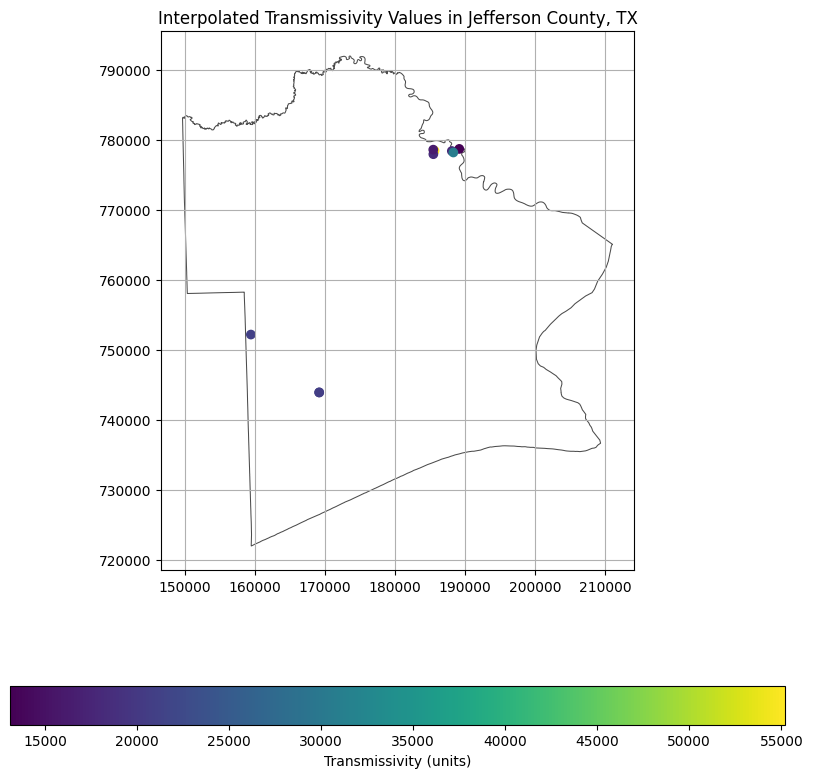

In [5]:
# Ensure both GeoDataFrames are in EPSG:6350
Tvalues = Tvalues.to_crs(epsg=6350)
Jeff = Jeff.to_crs(epsg=6350)

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Jefferson County boundary
Jeff.plot(ax=ax, color='none', edgecolor='black', alpha=0.7, linewidth=0.75)

# Plot transmissivity values as a color-coded layer
# Assuming 'Transmissivity' is the column name in Tvalues containing the interpolated transmissivity values
Tvalues.plot(column='T', ax=ax, cmap='viridis', legend=True,
             legend_kwds={'label': "Transmissivity (units)", 'orientation': "horizontal"})

# Add title and grid
plt.title("Interpolated Transmissivity Values in Jefferson County, TX")
plt.grid(visible=True)

# Display the map
plt.show()

In [6]:
# Print the CRS of both GeoDataFrames
print("CRS of Tvalues:", Tvalues.crs)
print("CRS of Jeff:", Jeff.crs)

CRS of Tvalues: EPSG:6350
CRS of Jeff: EPSG:6350


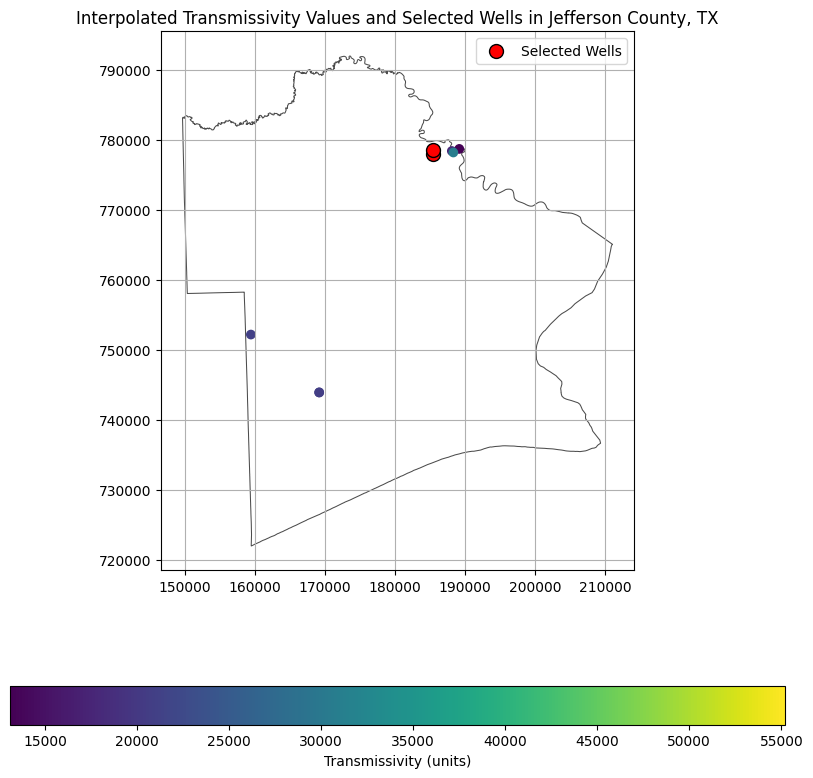

In [45]:
# Define the selected Well IDs for filtering
selected_wells = [4,5]  # Replace with actual Well IDs from Tvalues

# Filter the Tvalues GeoDataFrame to only include the selected wells
selected_Tvalues = Tvalues[Tvalues['WellID'].isin(selected_wells)]

# Plotting the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Jefferson County boundary
Jeff.plot(ax=ax, color='none', edgecolor='black', alpha=0.7, linewidth=0.75)

# Plot transmissivity values as a color-coded layer
Tvalues.plot(column='T', ax=ax, cmap='viridis', legend=True,
             legend_kwds={'label': "Transmissivity (units)", 'orientation': "horizontal"})

# Plot the selected wells with a different marker
selected_Tvalues.plot(ax=ax, color='red', edgecolor='black', marker='o', markersize=100, label='Selected Wells')

# Add title and grid
plt.title("Interpolated Transmissivity Values and Selected Wells in Jefferson County, TX")
plt.grid(visible=True)

# Add legend
plt.legend()

# Display the map
plt.show()

<h4> Read Water Level Data</h4> 
Read Water Level from files('WaterLevelsMajor.txt') subset those for the Gulf Coast Aquifer

In [46]:
#Read the well main text
a = pd.read_csv('WellMain.txt', sep = '|', encoding = 'ISO-8859-1',low_memory=False)

In [47]:
a.columns

Index(['StateWellNumber', 'County', 'RiverBasin', 'GMA', 'RWPA', 'GCD',
       'AquiferCode', 'AquiferCodeDescription', 'AquiferId', 'Aquifer',
       'Classification', 'AquiferPickMethod', 'LatitudeDD', 'Dlat', 'Mlat',
       'Slat', 'LongitudeDD', 'Dlong', 'Mlong', 'Slong', 'CoordinateSource',
       'Owner', 'Driller', 'WellDepth', 'DepthSource', 'LandSurfaceElevation',
       'LandSurfaceElevationMethod', 'DrillingStartDate', 'DrillingMonth',
       'DrillingDay', 'DrillingYear', 'DrillingEndDate', 'DrillingMethod',
       'BoreHoleCompletion', 'WellType', 'Pump', 'PowerType', 'WellUse',
       'WaterLevelStatus', 'CurrentWaterLevelWell', 'WaterQualityAvailable',
       'CurrentWaterQualityWell', 'ReportingAgency', 'OtherDataAvailable',
       'Remarks', 'WellReportTrackingNumber', 'PluggingReportTrackingNumber',
       'USGSSiteNumber', 'TCEQSourceId', 'GCDWellNumber', 'OwnerWellNumber',
       'OtherWellNumber', 'PreviousStateWellNumber', 'CreatedDate',
       'LastUpdateDate'],


In [48]:
cols= ['StateWellNumber','County','LongitudeDD','LatitudeDD','LandSurfaceElevationMethod','WellDepth']

In [49]:
#Create a subset of Gulf Cost Wells in rows and selected columns from above
#Rows and columns both being filtered 
asub = a.loc[a.County=='Jefferson',cols]
asub.head()

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth
104893,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0
104894,6154902,Jefferson,-94.271111,30.159167,Digital Elevation Model -DEM,450.0
104895,6154903,Jefferson,-94.271111,30.159445,Interpolated From Topo Map,550.0
104896,6154904,Jefferson,-94.270278,30.161667,Digital Elevation Model -DEM,530.0
104897,6154905,Jefferson,-94.271389,30.159167,Interpolated From Topo Map,572.0


In [50]:
asub.describe()

,StateWellNumber,LongitudeDD,LatitudeDD,WellDepth
count,4.280000e+02,428.000000,428.000000,422.000000
mean,6.283796e+06,-94.185266,29.971791,449.199052
std,1.163050e+05,0.137146,0.119684,1426.164637
min,6.154901e+06,-94.442500,29.657223,6.000000
25%,6.163052e+06,-94.280208,29.883055,52.750000
50%,6.301204e+06,-94.194306,29.993195,152.500000
75%,6.407829e+06,-94.094583,30.060556,280.000000
max,6.424601e+06,-93.872500,30.180278,15005.000000


In [51]:
#Read Water Levels Major.txt
fname = 'WaterLevelsMajor.txt'
b = pd.read_csv(fname, sep = '|', encoding = 'ISO-8859-1',low_memory=False)

In [52]:
b.columns #List all the columns

Index(['StateWellNumber', 'County', 'Aquifer', 'Status', 'MeasurementMonth',
       'MeasurementDay', 'MeasurementYear', 'MeasurementDate',
       'MeasurementTime', 'DepthFromLSD', 'LandElevation',
       'LandElevationMethod', 'WaterElevation', 'MeasurementNumber',
       'MeasuringAgency', 'MethodOfMeasurement', 'Remarks', 'Comments',
       'CreatedDate', 'LastUpdateDate'],
      dtype='object')

In [53]:
bcol = ['StateWellNumber','MeasurementYear','WaterElevation','DepthFromLSD']

In [54]:
bsub = b.loc[b.County=='Jefferson',bcol] #Subset all rows of selected
bsub.head()

,StateWellNumber,MeasurementYear,WaterElevation,DepthFromLSD
878119,6154901,1941.0,23.10,6.90
878120,6154902,1986.0,-7.00,35.00
878121,6154902,1987.0,-3.25,31.25
878122,6154902,1989.0,-9.90,37.90
878123,6154902,1989.0,-16.36,44.36


In [55]:
#Extract Water Elevation Values
WLGCNumeric = bsub[['StateWellNumber','WaterElevation','DepthFromLSD']]
WLM = WLGCNumeric.groupby('StateWellNumber').mean()#Take Temprary Mean
WLM.dropna(inplace=True)
print(WLM)

                 WaterElevation  DepthFromLSD
StateWellNumber                              
6154901               23.100000      6.900000
6154902              -17.178889     45.178889
6154904              -17.287143     44.287143
6154905              -25.338571     51.338571
6155504               32.000000    -18.000000
...                         ...           ...
6423201                1.800000      3.200000
6423302                1.900000      1.100000
6423303                1.900000      1.100000
6424501                2.500000      2.500000
6424502                2.000000      3.000000

[195 rows x 2 columns]


<h4>Merge Aeverage Water Level and Well info into one table

In [56]:
# Merge with well infor and save to file for future use
# Inner Join Becasue I want only matching well that have both data 

WellData = pd.merge(asub,WLM,on= 'StateWellNumber', how = 'inner')
WellData = WellData.loc[WellData.DepthFromLSD > 0]
WellData.to_csv('Mean.csv') #make a Copy for future use
WellData.head()

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD
0,6154901,Jefferson,-94.266112,30.134722,Interpolated From Topo Map,21.0,23.100000,6.900000
1,6154902,Jefferson,-94.271111,30.159167,Digital Elevation Model -DEM,450.0,-17.178889,45.178889
2,6154904,Jefferson,-94.270278,30.161667,Digital Elevation Model -DEM,530.0,-17.287143,44.287143
3,6154905,Jefferson,-94.271389,30.159167,Interpolated From Topo Map,572.0,-25.338571,51.338571
7,6155701,Jefferson,-94.213889,30.130555,Interpolated From Topo Map,68.0,27.000000,9.000000


In [57]:
#Create geometry from the latitude and longitude colums
geometry = [Point(xy) for xy in zip(WellData['LongitudeDD'], WellData['LatitudeDD'])]

#Convert pandas dataframe to Geodataframe
Wellgpf = gpd.GeoDataFrame(WellData, geometry=geometry)

#optionally Set a coordinate reference system(CRS), e.g., NAD 83, EPSG 6350
Wellgpf.set_crs(epsg=6350, inplace=True)

#Now 'Wellgpf' is a Geodataframe with points
print(Wellgpf)

     StateWellNumber     County  LongitudeDD  LatitudeDD  \
0            6154901  Jefferson   -94.266112   30.134722   
1            6154902  Jefferson   -94.271111   30.159167   
2            6154904  Jefferson   -94.270278   30.161667   
3            6154905  Jefferson   -94.271389   30.159167   
7            6155701  Jefferson   -94.213889   30.130555   
..               ...        ...          ...         ...   
190          6423201  Jefferson   -94.199722   29.742500   
191          6423302  Jefferson   -94.164167   29.741389   
192          6423303  Jefferson   -94.161667   29.739445   
193          6424501  Jefferson   -94.072500   29.668055   
194          6424502  Jefferson   -94.072778   29.667778   

       LandSurfaceElevationMethod  WellDepth  WaterElevation  DepthFromLSD  \
0      Interpolated From Topo Map       21.0       23.100000      6.900000   
1    Digital Elevation Model -DEM      450.0      -17.178889     45.178889   
2    Digital Elevation Model -DEM      530.0 

In [58]:
selected = [6164505, 6164506]
selected_wells = WellData[WellData.StateWellNumber.isin(selected)]
selected_wells

,StateWellNumber,County,LongitudeDD,LatitudeDD,LandSurfaceElevationMethod,WellDepth,WaterElevation,DepthFromLSD
66,6164505,Jefferson,-94.073889,30.053056,Interpolated From Topo Map,775.0,-21.193333,47.193333
67,6164506,Jefferson,-94.073889,30.066944,Interpolated From Topo Map,765.0,-14.666667,39.666667


In [61]:
# Given values
water_elevation = [-21.193333, -14.666667]  # in feet
depth_from_lsd = [47.193333, 39.666667]  # in feet

# Calculate hydraulic head for each pair
hydraulic_head = [water + depth for water, depth in zip(water_elevation, depth_from_lsd)]
hydraulic_head


[26.000000000000004, 24.999999999999996]

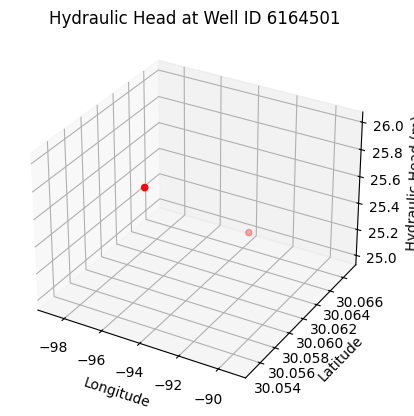

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coordinates
latitude = [30.053056, 30.066944]
longitude = [-94.03889,-94.03889] 
hydraulic_head = [26.000000000000004, 24.999999999999996]

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the point
ax.scatter(longitude, latitude, hydraulic_head, c='r', marker='o')

# Labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Hydraulic Head (m)')

# Title
plt.title('Hydraulic Head at Well ID 6164501')

# Show the plot
plt.show()


C:\Users\Prabin-PC\AppData\Local\Temp\ipykernel_25100\2217937366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_wells['geometry'] = selected_wells.apply(lambda row: Point(row['LongitudeDD'], row['LatitudeDD']), axis=1)


Selected Wells in EPSG:6350:
    StateWellNumber  LongitudeDD  LatitudeDD                      geometry
66          6164505   -94.073889   30.053056  POINT (-94.073889 30.053056)
67          6164506   -94.073889   30.066944  POINT (-94.073889 30.066944)
Transformed Model Coordinates GeoDataFrame:
   StateWellNumber                geometry
0          6164505  POINT (94.074 -30.053)
1          6164506  POINT (94.074 -30.067)


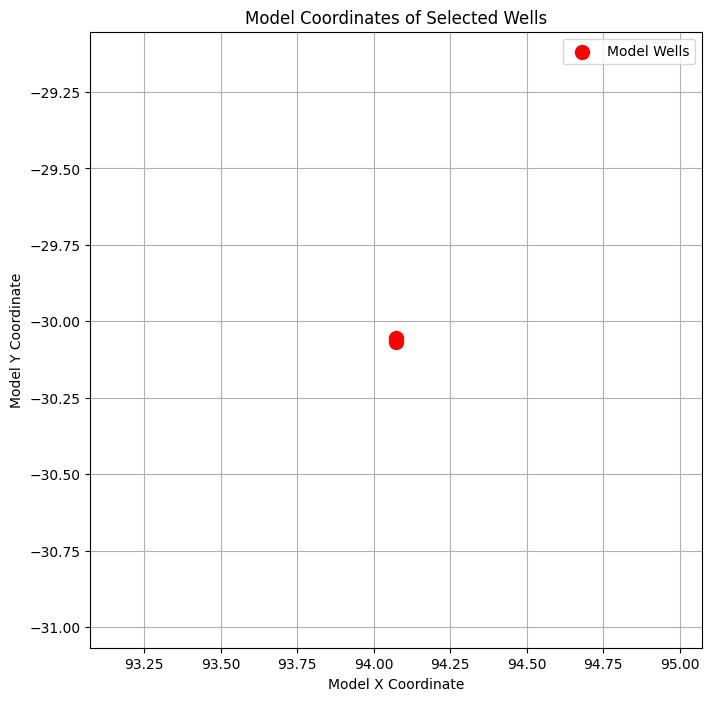

In [65]:
# Assuming you have WellData GeoDataFrame and it has been filtered for selected wells
selected = [6164505, 6164506]
selected_wells = WellData[WellData.StateWellNumber.isin(selected)]

# Check if the geometry column exists
if 'geometry' not in selected_wells.columns:
    # If geometry is not available, create it from LongitudeDD and LatitudeDD
    selected_wells['geometry'] = selected_wells.apply(lambda row: Point(row['LongitudeDD'], row['LatitudeDD']), axis=1)

# Display the selected well coordinates in EPSG:6350
print("Selected Wells in EPSG:6350:")
print(selected_wells[['StateWellNumber', 'LongitudeDD', 'LatitudeDD', 'geometry']])

# Extract the real-world coordinates from the selected wells GeoDataFrame
real_world_coordinates = selected_wells[['LongitudeDD', 'LatitudeDD']].values

# Define the model origin (0, 0)
model_origin = np.array([0, 0])

# Calculate model coordinates by subtracting real-world coordinates from model origin
model_coordinates = []
for coord in real_world_coordinates:
    real_world_coord = np.array(coord)
    # Transform to model coordinates
    model_coord = model_origin - real_world_coord
    model_coordinates.append(model_coord)

# Define the geometry for the transformed model coordinates
model_geometries = [Point(coord) for coord in model_coordinates]

# Create a new GeoDataFrame for the model coordinates
model_gdf = gpd.GeoDataFrame({
    'StateWellNumber': selected,
    'geometry': model_geometries
}, crs='EPSG:6350')  # Set the CRS to EPSG:6350

# Display the new GeoDataFrame with model coordinates
print("Transformed Model Coordinates GeoDataFrame:")
print(model_gdf)

# Optionally, visualize the transformed model coordinates
# Plot the model coordinates
fig, ax = plt.subplots(figsize=(8, 8))
model_gdf.plot(ax=ax, color='red', marker='o', markersize=100, label='Model Wells')

# Dynamic rescaling based on the model coordinates
x_coords = model_gdf.geometry.x
y_coords = model_gdf.geometry.y

# Set limits based on the coordinates with some padding
padding = 1.0  # Adjust the padding as needed
ax.set_xlim(x_coords.min() - padding, x_coords.max() + padding)
ax.set_ylim(y_coords.min() - padding, y_coords.max() + padding)

# Add grid lines and reference lines for the origin
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.title("Model Coordinates of Selected Wells")
plt.xlabel("Model X Coordinate")
plt.ylabel("Model Y Coordinate")
plt.legend()
plt.grid()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Sample data for the well and neighboring wells
data = {
    'StateWellNumber': [6164505, 6164506],
    'LongitudeDD': [-94.03889, -94.03889],
    'LatitudeDD': [30.053056, 30.066944],
    'WaterElevation': [-21.193333, -14.666667]  # Ensure that the length matches the number of wells
}

df = pd.DataFrame(data)

# Calculate differences to find gradients
df['dx'] = df['LongitudeDD'] - df['LongitudeDD'].mean()
df['dy'] = df['LatitudeDD'] - df['LatitudeDD'].mean()
df['dh'] = df['WaterElevation'] - df['WaterElevation'].mean()

# Calculate gradients (dh/dx and dh/dy)
df['a'] = df['dh'] / df['dx'].replace(0, np.nan)  # Handle division by zero
df['b'] = df['dh'] / df['dy'].replace(0, np.nan)  # Handle division by zero

# Average gradients
a = df['a'].mean()
b = df['b'].mean()

print(f"Gradient a (dh/dx): {a}")
print(f"Gradient b (dh/dy): {b}")

# Fit the regression model
X = df[['dx', 'dy']]
X = sm.add_constant(X)  # Add intercept
y = df['WaterElevation']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


Gradient a (dh/dx): nan
Gradient b (dh/dy): 469.95002880191424
                            OLS Regression Results                            
Dep. Variable:         WaterElevation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 05 Nov 2024   Prob (F-statistic):                nan
Time:                        20:15:21   Log-Likelihood:                 63.704
No. Observations:                   2   AIC:                            -123.4
Df Residuals:                       0   BIC:                            -126.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Users\demon\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Users\demon\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Users\demon\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\demon\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(se

In [68]:
import geopandas as gpd

# Load T values from the CSV file
fname = 'Tvalues.csv'
Tv = gpd.read_file(fname)

# Define constants
Pop = 22500  # Population
pcu = 135    # Gallons per day per capita
conversion_factor = 0.133681  # Gallons to cubic feet conversion factor
Q = Pop * pcu * conversion_factor  # Total water consumption in cubic feet
B = 100     # Assumed aquifer thickness (in feet)

# Output the total water consumption
print(f"Total water consumption (Q) in cubic feet: {Q:.2f}")

# Design parameters
tyears = 10  # Design time in years
S = 0.005    # Storage coefficient

# Extract T values from GeoDataFrame
T = Tv['T']  # Ensure 'T' is the correct column name in your GeoDataFrame
print(f"T values: {T.tolist()}")


Total water consumption (Q) in cubic feet: 406056.04
T values: ['55200', '13100', '18000', '18300', '16300', '30800', '21000', '21300', '20800']


In [69]:
import numpy as np

# Values for Q, T, and i
Q = 406056.04  # Discharge in m^3/s (example value)
T = np.array([55200, 13100, 18000, 18300, 16300, 30800, 21000, 21300, 20800])  # Transmissivity in m^2/s
i = 0.2  # Hydraulic gradient (example value)

# Select a specific transmissivity value (for example, the first value in T)
T_index = 0  # Change this index to select a different T value
T_selected = T[T_index]  # Get the selected T value

def stagnation_point(Q, T, i):
    """Calculate the stagnation point x_s."""
    return -Q / (2 * np.pi * T * i)

def max_y(Q, T, i):
    """Calculate the maximum y values as a tuple (positive, negative)."""
    y_max = Q / (T * i)  # Calculate maximum y for the transmissivity value
    return y_max, -y_max

def capture_zone_boundary(y, Q, T, i):
    """Calculate the x value along the capture zone boundary for a given y."""
    return -y / np.tan((2 * np.pi * T * i * y) / Q)

# Stagnation point for the selected T value
x_s = stagnation_point(Q, T_selected, i)

# Maximum y values for the selected T
y_max_positive, y_max_negative = max_y(Q, T_selected, i)

# Outputs (You can print or use them as needed)
print(f"Stagnation Point (x_s) for T[{T_index}]: {x_s}")
print(f"Maximum y values (positive) for T[{T_index}]: {y_max_positive}")
print(f"Maximum y values (negative) for T[{T_index}]: {y_max_negative}")
print(f"Capture Zone Boundary for y={y_example} and T[{T_index}]: {x_boundary}")


Stagnation Point (x_s) for T[0]: -5.8537885813695985
Maximum y values (positive) for T[0]: 36.7804384057971
Maximum y values (negative) for T[0]: -36.7804384057971
Capture Zone Boundary for y=10 and T[0]: [  1.38372177 -23.29993399 -16.05519106 -15.72789971 -18.11316457
  -7.10317605 -13.15722469 -12.90671405 -13.32765717]
